### Covid Tweets Sentiment Classifier Project

1) Read the dataset "Corona_NLP_train.csv".<br>
2) Remove/handle significant null values if any<br>
3) Preprocess the Covid tweets based on following parameter<br>
        
       a) Remove numbers/ non words characters
       b) Convert tweets to lower case.
       c) Word tokenize the tweets or use split function.
       d) Remove stop words
       e) Apply stemming or lemmatization
       
       
4) Convert the 'Extremely Positive' and 'Extremely Negative' Sentiments to 'Positive' and 'Negative' sentiments respectively<br>
5) Apply CountVectorizer and convert the tweets to an array<br>
6) Split the dataset into train and test data with test size of 20%.<br>
7) Create a NaiveBayes Classifier and apply it on train dataset and use the model to predict it on test dataset.<br>
8) Create a LogisticRegression Classifier and apply it on train dataset and use the model to predict it on test dataset.<br>
9) Create a RandomForest Classifier and apply it on train dataset and use the model to predict it on test dataset.<br>
10) Generate confusion matrix and classification_report for Ques 7, 8 and 9.<br>
11) Apply TfIdfVectorizer and convert the tweets to an array.<br>
12) Repeat Ques 6-10 with training data derived from array generated from TfIdfvectorizer

In [260]:
import pandas as pd
import numpy as np
import re
import nltk
from sklearn.datasets import load_files
nltk.download('stopwords')
import pickle
from nltk.corpus import stopwords
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.datasets import make_blobs
from sklearn import tree

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [261]:
from google.colab import drive 
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [262]:
import pandas as pd

In [263]:
df=pd.read_csv('//content//drive//My Drive//Corona_NLP_train.csv',encoding='latin1') 
df.head(2)

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive


In [264]:
df.shape

(41157, 6)

In [265]:
df.isnull().sum()

UserName            0
ScreenName          0
Location         8590
TweetAt             0
OriginalTweet       0
Sentiment           0
dtype: int64

In [266]:
df.drop(['Location','UserName','ScreenName','TweetAt'], axis=1, inplace=True)

In [267]:
df.isnull().sum()

OriginalTweet    0
Sentiment        0
dtype: int64

In [268]:
df

,OriginalTweet,Sentiment
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,advice Talk to your neighbours family to excha...,Positive
2,Coronavirus Australia: Woolworths to give elde...,Positive
3,My food stock is not the only one which is emp...,Positive
4,"Me, ready to go at supermarket during the #COV...",Extremely Negative
...,...,...
41152,Airline pilots offering to stock supermarket s...,Neutral
41153,Response to complaint not provided citing COVI...,Extremely Negative
41154,You know itÂs getting tough when @KameronWild...,Positive
41155,Is it wrong that the smell of hand sanitizer i...,Neutral


In [269]:
df.nunique()

OriginalTweet    41157
Sentiment            5
dtype: int64

In [270]:
x=df['OriginalTweet']
print(x.value_counts())

The global stock market rally feels fragile | Nils Pratley Shares have bounced back but itÂs too soon to call the bottom for prices in the Covid-19 pandemicHave we seen the bottom for stock markets? It is tempting to believe so after two... - https://t.co/2PYYcom0fL                                                   1
@Visa Hey.  Wouldn't it be a great idea to lift, or at least raise, the Â£30 contactless limit during this time of covid-19 so we don't have to touch pin machines, and very likely spread disease when checking out in the supermarket?                                                                                      1
We managed to get 8 rolls of toilet paper, but according to the package, it's equal to 512 rolls, so we should be all set.\r\r\n#coronavirus #toiletpaper #toiletpapermath #StayHome                                                                                                                                          1
Any corner shops I see today with inflat

In [271]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   OriginalTweet  41157 non-null  object
 1   Sentiment      41157 non-null  object
dtypes: object(2)
memory usage: 643.2+ KB


In [272]:
df.groupby('OriginalTweet').count()

,Sentiment
OriginalTweet,
Coronavirus lingers in air longer than previously thought scientists warn,1
amp,1
Hand Sanitizer Free Gift For Current Situation,1
Our medical frontliners are our country s first line of defense in our fight against COVID 19 As our way of showing our appreciation they are given access to the priority lanes at Robinsons Supermarket,1
Police officers handed out rolls of toilet paper at a supermarket on Thursday to try to calm shoppers down during the outbreak in,1
...,...
Â«Â Industrial real-estate operators expect the disruption of consumer supply chains caused by the coronavirus pandemic to drive a new surge in #warehousing demandÂ Â» #RealEstate #COVID2019 #logistics\r\r\nhttps://t.co/0jiC0w0yGZ,1
"Â«Â Well, officer, it is quite simple actually: I cycled up the hill to the supermarket to buy catÂs food, so I ticked all thÃ© boxesÂ Â». #MaVieConfinee #confinementjour2 #COVID2019 #relax ?? https://t.co/WYRIReGhen",1
Â» CONSUMER ALERT: Coronavirus (COVID-19): Know Your Rights | Attorney General Karl A. Racine https://t.co/5pJGz2aRNk,1


In [273]:
Category_count=df.groupby('Sentiment').count()

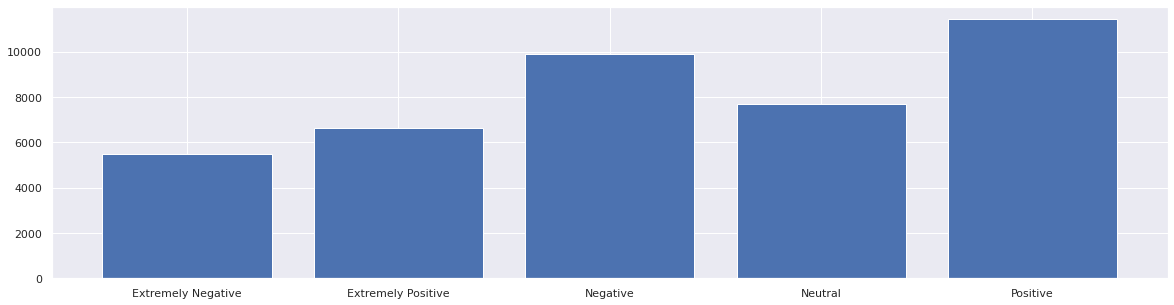

In [274]:
r=df
import matplotlib.pyplot as plt
plt.figure(figsize=(20,5))
Category_count=r.groupby('Sentiment').count()
plt.bar(Category_count.index.values, Category_count['OriginalTweet'])
plt.show()

In [275]:
Category_count['OriginalTweet']

Sentiment
Extremely Negative     5481
Extremely Positive     6624
Negative               9917
Neutral                7713
Positive              11422
Name: OriginalTweet, dtype: int64

In [276]:
df['Sentiment1'] = df['Sentiment'].replace(['Extremely Negative','Negative'],'Negative')
df['Sentiment1'] = df['Sentiment1'].replace(['Extremely Positive','Positive'],'Positive')
Sentiment1= df['Sentiment1']
print(Sentiment1.shape)
print(df.shape)

(41157,)
(41157, 3)


In [277]:
# df
df.drop(['Sentiment'], axis=1, inplace=True)
print(df.head(5))
print(df.head(5))

                                       OriginalTweet Sentiment1
0  @MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...    Neutral
1  advice Talk to your neighbours family to excha...   Positive
2  Coronavirus Australia: Woolworths to give elde...   Positive
3  My food stock is not the only one which is emp...   Positive
4  Me, ready to go at supermarket during the #COV...   Negative
                                       OriginalTweet Sentiment1
0  @MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...    Neutral
1  advice Talk to your neighbours family to excha...   Positive
2  Coronavirus Australia: Woolworths to give elde...   Positive
3  My food stock is not the only one which is emp...   Positive
4  Me, ready to go at supermarket during the #COV...   Negative


In [278]:
df.head()

,OriginalTweet,Sentiment1
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,advice Talk to your neighbours family to excha...,Positive
2,Coronavirus Australia: Woolworths to give elde...,Positive
3,My food stock is not the only one which is emp...,Positive
4,"Me, ready to go at supermarket during the #COV...",Negative


In [279]:
X=df.iloc[:,:1]
y=df.iloc[:,1]

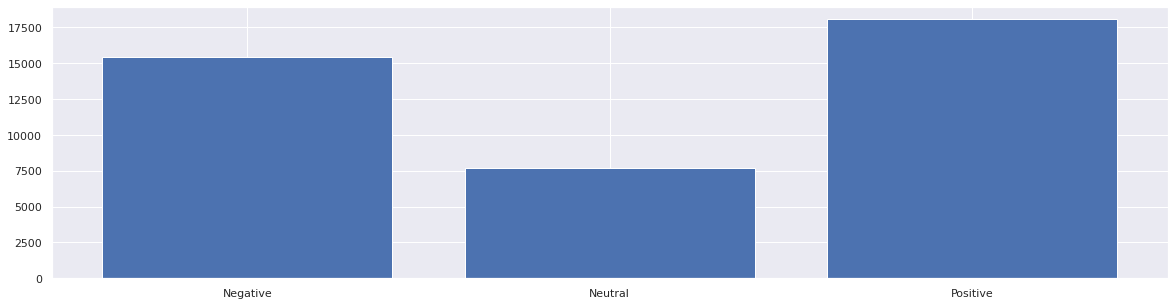

In [280]:
r=df
import matplotlib.pyplot as plt
plt.figure(figsize=(20,5))
Category_count=r.groupby('Sentiment1').count()
plt.bar(Category_count.index.values, Category_count['OriginalTweet'])
plt.show()

## [CountVectorizer]
## Artificial Neural Network (ANN)

In [281]:
df.shape

(41157, 2)

In [282]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
y = lb.fit_transform(y)
y

array([1, 2, 2, ..., 2, 1, 0])

In [283]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(lowercase=True,stop_words='english',ngram_range=(1,1), tokenizer = token.tokenize)
X = cv.fit_transform(df['OriginalTweet'])
X

<41157x78279 sparse matrix of type '<class 'numpy.int64'>'
	with 770215 stored elements in Compressed Sparse Row format>

In [284]:
y

array([1, 2, 2, ..., 2, 1, 0])

In [243]:
X

<41157x78279 sparse matrix of type '<class 'numpy.int64'>'
	with 770215 stored elements in Compressed Sparse Row format>

In [244]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(32925, 78279)
(8232, 78279)
(32925,)
(8232,)


In [245]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler(with_mean=False)
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [50]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout

In [51]:
model = Sequential()
model.add(Dense(units=16,activation='relu', input_shape=(78279,))) 
model.add(Dropout(0.1))
model.add(Dense(units=16,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(units=1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])

In [66]:
model.fit(x=X_train, y=y_train, epochs=5,batch_size=10000, validation_data=(X_test, y_test), verbose=1)

Epoch 1/5
4/4 [==============================] - 0s 96ms/step - loss: -12423190.0000 - accuracy: 0.3740 - val_loss: -4456195.5000 - val_accuracy: 0.2194
Epoch 2/5
4/4 [==============================] - 0s 92ms/step - loss: -12449465.0000 - accuracy: 0.3765 - val_loss: -4461887.5000 - val_accuracy: 0.2194
Epoch 3/5
4/4 [==============================] - 0s 86ms/step - loss: -12485737.0000 - accuracy: 0.3742 - val_loss: -4467723.0000 - val_accuracy: 0.2194
Epoch 4/5
4/4 [==============================] - 0s 87ms/step - loss: -12521476.0000 - accuracy: 0.3754 - val_loss: -4473570.5000 - val_accuracy: 0.2194
Epoch 5/5
4/4 [==============================] - 0s 93ms/step - loss: -12523230.0000 - accuracy: 0.3769 - val_loss: -4479407.0000 - val_accuracy: 0.2194


In [70]:
y_pred_m1 = model.predict(X_test)
#y_pred_m1

In [71]:
y_pred_m1_cls = model.predict_classes(X_test)
#y_pred_m1_cls

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [72]:
y_pred = model.predict_classes(X_test)
y_pred

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([[1],
       [1],
       [1],
       ...,
       [1],
       [0],
       [1]], dtype=int32)

In [73]:
loss,acc = model.evaluate(X_test,y_test)
print('Loss',loss)
print('Accuracy',acc)

258/258 [==============================] - 0s 1ms/step - loss: -4479407.5000 - accuracy: 0.2194
Loss -4479407.5
Accuracy 0.21938775479793549


In [74]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[ 339 2771    0]
 [  43 1467    0]
 [  25 3587    0]]


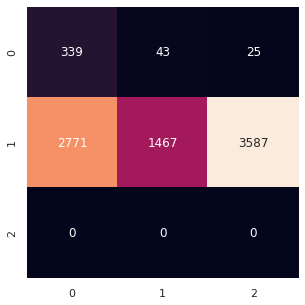

In [75]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(15,5))
lr= confusion_matrix(y_test,y_pred)
sns.heatmap(lr.T, square=True, annot=True, fmt='d', cbar=False,)
plt.show()

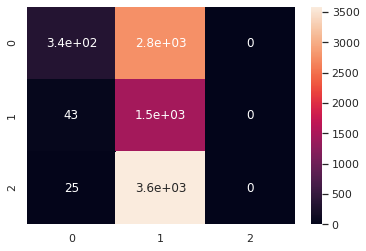

In [76]:
import seaborn as sns
sns.heatmap(lr, annot=True)
plt.show()

In [77]:
print(accuracy_score(y_test, y_pred))

0.2193877551020408


In [78]:
loss,acc = model.evaluate(X_test, y_test)
print('Loss is',loss)
print('Accuracy is',acc)

258/258 [==============================] - 0s 1ms/step - loss: -4479407.5000 - accuracy: 0.2194
Loss is -4479407.5
Accuracy is 0.21938775479793549


In [79]:
from sklearn.metrics import classification_report

In [80]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.11      0.19      3110
           1       0.19      0.97      0.31      1510
           2       0.00      0.00      0.00      3612

    accuracy                           0.22      8232
   macro avg       0.34      0.36      0.17      8232
weighted avg       0.35      0.22      0.13      8232



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## [TfidfVectorizer] Term Frequency-Inverse Document Frequency
#### 1. Multinomial Naive Bayes, 2. Logistic Regression, 3. Random Forest Classifier, 4. Decision Tree, 5. K- Nearest Neighbor

In [246]:
df.shape

(41157, 2)

In [247]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf=TfidfVectorizer()
X=tf.fit_transform(r['OriginalTweet'])
X

<41157x80424 sparse matrix of type '<class 'numpy.float64'>'
	with 1149620 stored elements in Compressed Sparse Row format>

In [248]:
y=df['Sentiment1']

In [249]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=123)

In [250]:
#text_tf,r['OriginalTweet'],r['Sentiment1']

In [251]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(32925, 80424)
(8232, 80424)
(32925,)
(8232,)


In [169]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

### 1. Multinomial Naive Bayes

In [170]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
nb= MultinomialNB().fit(x_train,y_train)
nb

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [171]:
nb.score(x_train,y_train)

0.7207289293849658

In [172]:
nb.score(x_test,y_test)

0.6353255587949466

In [173]:
y_pred_nb= nb.predict(x_test)
print(len(y_pred_nb))
y_pred_nb

8232


array(['Negative', 'Positive', 'Positive', ..., 'Positive', 'Negative',
       'Positive'], dtype='<U8')

In [174]:
metrics.accuracy_score(y_test,y_pred_nb)

0.6353255587949466

In [175]:
print(confusion_matrix (y_test,y_pred_nb))

[[1836    1 1231]
 [ 314   20 1173]
 [ 280    3 3374]]


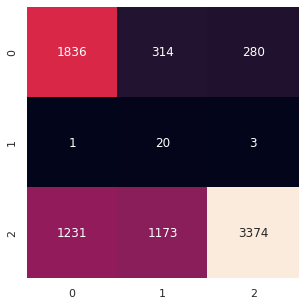

In [176]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(15,5))
nb= confusion_matrix(y_test,y_pred_nb)
sns.heatmap(nb.T, square=True, annot=True, fmt='d', cbar=False,)
plt.show()

In [177]:
nb_df=pd.DataFrame({'y_test':y_test,'y_pred_nb':y_pred_nb})
nb_df.head()

,y_test,y_pred_nb
21746,Negative,Negative
27641,Positive,Positive
16374,Neutral,Positive
35458,Negative,Negative
38444,Positive,Positive


In [178]:
nb_df.groupby(['y_test','y_pred_nb'])['y_pred_nb'].count()  

y_test    y_pred_nb
Negative  Negative     1836
          Neutral         1
          Positive     1231
Neutral   Negative      314
          Neutral        20
          Positive     1173
Positive  Negative      280
          Neutral         3
          Positive     3374
Name: y_pred_nb, dtype: int64

In [179]:
from sklearn.metrics import classification_report
print(classification_report (y_test,y_pred_nb))

              precision    recall  f1-score   support

    Negative       0.76      0.60      0.67      3068
     Neutral       0.83      0.01      0.03      1507
    Positive       0.58      0.92      0.72      3657

    accuracy                           0.64      8232
   macro avg       0.72      0.51      0.47      8232
weighted avg       0.69      0.64      0.57      8232



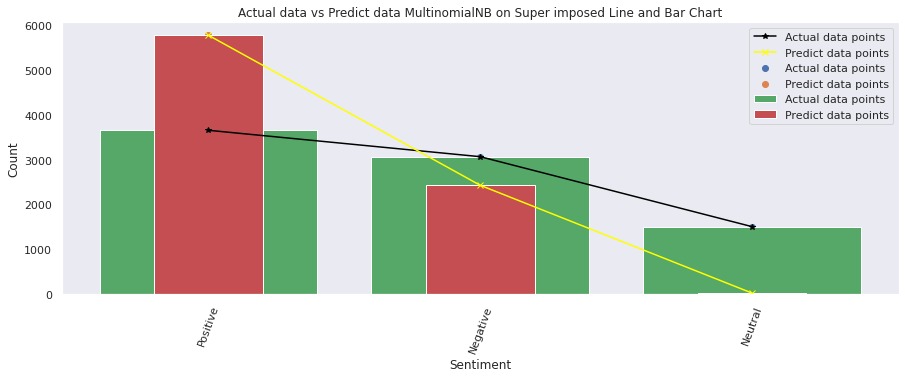

In [180]:
actual_nb=nb_df['y_test'].value_counts()
predict_nb=nb_df['y_pred_nb'].value_counts()
plt.figure(figsize=(15,5))
plt.scatter(actual_nb.index,actual_nb.values,label='Actual data points')
plt.plot(actual_nb.index,actual_nb.values,marker='*',color='black',label='Actual data points')
plt.plot(predict_nb.index,predict_nb.values,marker='x',color='yellow',label='Predict data points')
plt.scatter(predict_nb.index,predict_nb.values,label='Predict data points')
plt.bar(actual_nb.index,actual_nb.values,label='Actual data points')
plt.bar(predict_nb.index,predict_nb.values,width=0.4,label='Predict data points')
plt.legend()
plt.title("Actual data vs Predict data MultinomialNB on Super imposed Line and Bar Chart")
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=70)
plt.grid()
plt.show()

In [182]:
print("MultinomialNB Accuracy:",metrics.accuracy_score(y_test,y_pred_nb))

MultinomialNB Accuracy: 0.6353255587949466


### 2. Classification (Logistic Regression)

In [183]:
from sklearn.linear_model import LogisticRegression
lr =LogisticRegression()
lr.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [184]:
lr.score(x_train,y_train)

0.9085193621867882

In [185]:
lr.score(x_test,y_test)

0.7920310981535471

In [186]:
y_pred_lr = lr.predict(x_test)
len(y_pred_lr),y_pred_lr

(8232, array(['Negative', 'Positive', 'Negative', ..., 'Neutral', 'Negative',
        'Positive'], dtype=object))

In [187]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred_lr)

array([[2511,  174,  383],
       [ 262,  898,  347],
       [ 361,  185, 3111]])

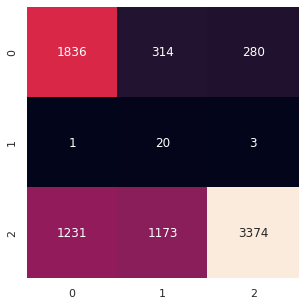

In [188]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(15,5))
lr= confusion_matrix(y_test,y_pred_nb)
sns.heatmap(lr.T, square=True, annot=True, fmt='d', cbar=False,)
plt.show()

In [189]:
lr_df=pd.DataFrame({'y_test':y_test,'y_pred_lr':y_pred_lr})
lr_df.head()

,y_test,y_pred_lr
21746,Negative,Negative
27641,Positive,Positive
16374,Neutral,Negative
35458,Negative,Negative
38444,Positive,Positive


In [190]:
lr_df.groupby(['y_test','y_pred_lr'])['y_pred_lr'].count()

y_test    y_pred_lr
Negative  Negative     2511
          Neutral       174
          Positive      383
Neutral   Negative      262
          Neutral       898
          Positive      347
Positive  Negative      361
          Neutral       185
          Positive     3111
Name: y_pred_lr, dtype: int64

In [191]:
from sklearn.metrics import classification_report
print(classification_report (y_test,y_pred_lr))

              precision    recall  f1-score   support

    Negative       0.80      0.82      0.81      3068
     Neutral       0.71      0.60      0.65      1507
    Positive       0.81      0.85      0.83      3657

    accuracy                           0.79      8232
   macro avg       0.78      0.76      0.76      8232
weighted avg       0.79      0.79      0.79      8232



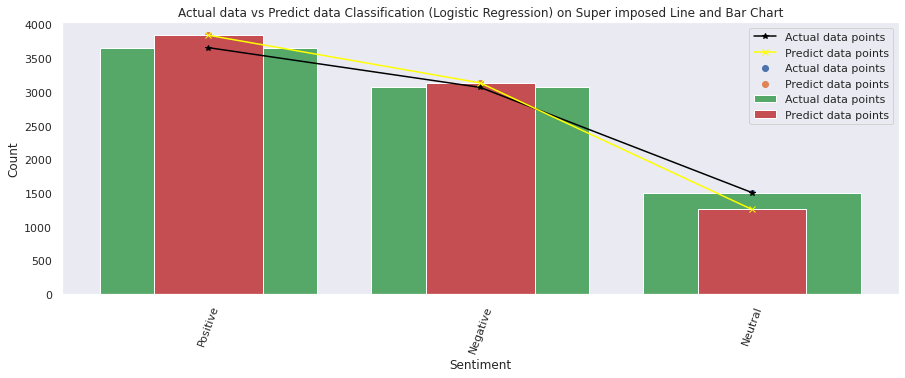

In [192]:
actual_nb=lr_df['y_test'].value_counts()
predict_nb=lr_df['y_pred_lr'].value_counts()
plt.figure(figsize=(15,5))
plt.scatter(actual_nb.index,actual_nb.values,label='Actual data points')
plt.plot(actual_nb.index,actual_nb.values,marker='*',color='black',label='Actual data points')
plt.plot(predict_nb.index,predict_nb.values,marker='x',color='yellow',label='Predict data points')
plt.scatter(predict_nb.index,predict_nb.values,label='Predict data points')
plt.bar(actual_nb.index,actual_nb.values,label='Actual data points')
plt.bar(predict_nb.index,predict_nb.values,width=0.4,label='Predict data points')
plt.legend()
plt.title("Actual data vs Predict data Classification (Logistic Regression) on Super imposed Line and Bar Chart")
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=70)
plt.grid()
plt.show()

In [193]:
metrics.accuracy_score(y_test,y_pred_lr)

0.7920310981535471

### 3. Random  Forest  Classifier  

In [194]:
from sklearn.ensemble import RandomForestClassifier

In [195]:
rfc = RandomForestClassifier(n_estimators=10,max_depth=5,max_features='sqrt',min_samples_split=20)

In [196]:
rfc.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=20,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [197]:
rfc.fit(x_test,y_test)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=20,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [198]:
rfc.score(x_test,y_test)

0.461491739552964

In [199]:
rfc.score(x_train,y_train)

0.44546697038724375

In [200]:
y_pred_rfc = rfc.predict(x_test)
y_pred_rfc

array(['Negative', 'Positive', 'Positive', ..., 'Positive', 'Positive',
       'Positive'], dtype=object)

In [201]:
metrics.accuracy_score(y_test,y_pred_rfc)

0.461491739552964

In [202]:
confusion_matrix(y_test,y_pred_rfc)

array([[ 166,    0, 2902],
       [  13,    0, 1494],
       [  24,    0, 3633]])

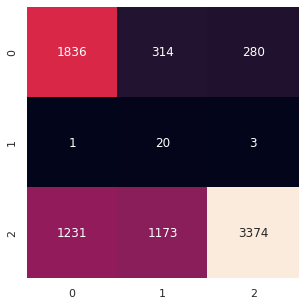

In [203]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(15,5))
rfc= confusion_matrix(y_test,y_pred_nb)
sns.heatmap(rfc.T, square=True, annot=True, fmt='d', cbar=False,)
plt.show()

In [204]:
rfc_df=pd.DataFrame({'y_test':y_test,'y_pred_rfc':y_pred_rfc})
rfc_df.head()

,y_test,y_pred_rfc
21746,Negative,Negative
27641,Positive,Positive
16374,Neutral,Positive
35458,Negative,Positive
38444,Positive,Positive


In [205]:
rfc_df.groupby(['y_test','y_pred_rfc'])['y_pred_rfc'].count()

y_test    y_pred_rfc
Negative  Negative       166
          Positive      2902
Neutral   Negative        13
          Positive      1494
Positive  Negative        24
          Positive      3633
Name: y_pred_rfc, dtype: int64

In [206]:
print(classification_report(y_test,y_pred_rfc))

              precision    recall  f1-score   support

    Negative       0.82      0.05      0.10      3068
     Neutral       0.00      0.00      0.00      1507
    Positive       0.45      0.99      0.62      3657

    accuracy                           0.46      8232
   macro avg       0.42      0.35      0.24      8232
weighted avg       0.51      0.46      0.31      8232



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


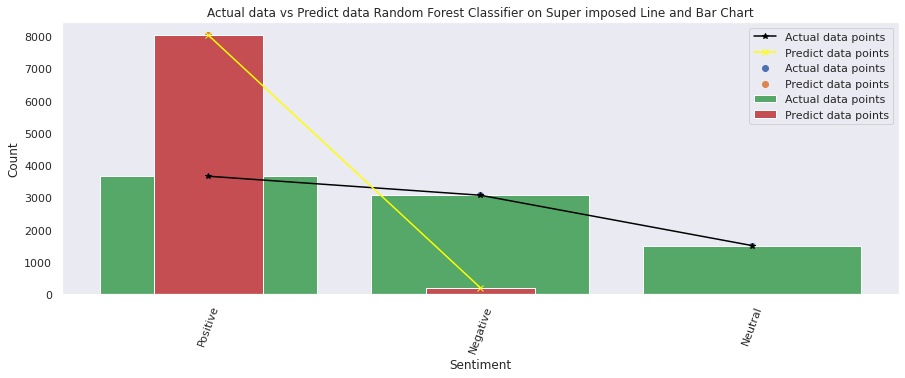

In [207]:
actual_nb=rfc_df['y_test'].value_counts()
predict_nb=rfc_df['y_pred_rfc'].value_counts()
plt.figure(figsize=(15,5))
plt.scatter(actual_nb.index,actual_nb.values,label='Actual data points')
plt.plot(actual_nb.index,actual_nb.values,marker='*',color='black',label='Actual data points')
plt.plot(predict_nb.index,predict_nb.values,marker='x',color='yellow',label='Predict data points')
plt.scatter(predict_nb.index,predict_nb.values,label='Predict data points')
plt.bar(actual_nb.index,actual_nb.values,label='Actual data points')
plt.bar(predict_nb.index,predict_nb.values,width=0.4,label='Predict data points')
plt.legend()
plt.title("Actual data vs Predict data Random Forest Classifier on Super imposed Line and Bar Chart")
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=70)
plt.grid()
plt.show()

In [208]:
metrics.accuracy_score(y_test,y_pred_rfc)

0.461491739552964

### 4. Decision Tree


In [209]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [210]:
print(dt.score(x_train,y_train))
print(dt.score(x_test,y_test))

1.0
0.593415937803693


In [211]:
y_pred_dt = dt.predict(x_test)
y_pred_dt

array(['Negative', 'Negative', 'Positive', ..., 'Negative', 'Negative',
       'Positive'], dtype=object)

In [212]:
confusion_matrix(y_test,y_pred_dt)

array([[1795,  404,  869],
       [ 394,  708,  405],
       [ 794,  481, 2382]])

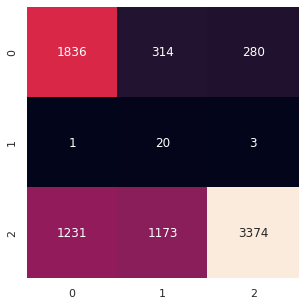

In [213]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(15,5))
dt= confusion_matrix(y_test,y_pred_nb)
sns.heatmap(dt.T, square=True, annot=True, fmt='d', cbar=False,)
plt.show()

In [214]:
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

    Negative       0.60      0.59      0.59      3068
     Neutral       0.44      0.47      0.46      1507
    Positive       0.65      0.65      0.65      3657

    accuracy                           0.59      8232
   macro avg       0.57      0.57      0.57      8232
weighted avg       0.60      0.59      0.59      8232



In [215]:
dt_df=pd.DataFrame({'y_test':y_test,'y_pred_dt':y_pred_dt})
dt_df.head()

,y_test,y_pred_dt
21746,Negative,Negative
27641,Positive,Negative
16374,Neutral,Positive
35458,Negative,Negative
38444,Positive,Positive


In [216]:
dt_df.groupby(['y_test','y_pred_dt'])['y_pred_dt'].count()

y_test    y_pred_dt
Negative  Negative     1795
          Neutral       404
          Positive      869
Neutral   Negative      394
          Neutral       708
          Positive      405
Positive  Negative      794
          Neutral       481
          Positive     2382
Name: y_pred_dt, dtype: int64

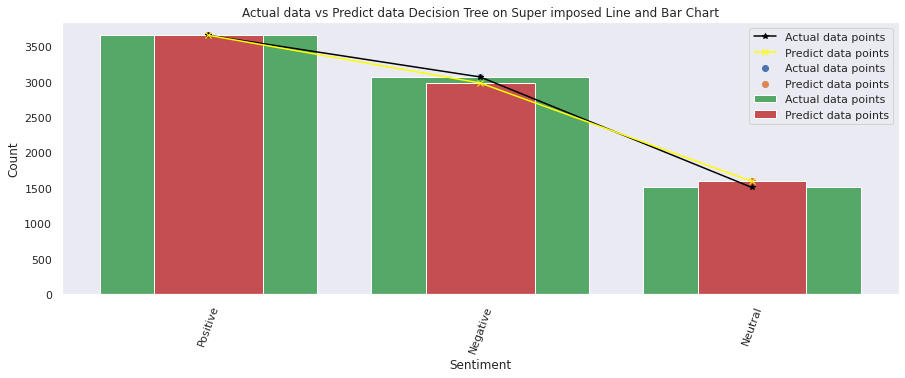

In [217]:
actual_nb=dt_df['y_test'].value_counts()
predict_nb=dt_df['y_pred_dt'].value_counts()
plt.figure(figsize=(15,5))
plt.scatter(actual_nb.index,actual_nb.values,label='Actual data points')
plt.plot(actual_nb.index,actual_nb.values,marker='*',color='black',label='Actual data points')
plt.plot(predict_nb.index,predict_nb.values,marker='x',color='yellow',label='Predict data points')
plt.scatter(predict_nb.index,predict_nb.values,label='Predict data points')
plt.bar(actual_nb.index,actual_nb.values,label='Actual data points')
plt.bar(predict_nb.index,predict_nb.values,width=0.4,label='Predict data points')
plt.legend()
plt.title("Actual data vs Predict data Decision Tree on Super imposed Line and Bar Chart")
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=70)
plt.grid()
plt.show()

In [218]:
print(accuracy_score(y_test,y_pred_dt))

0.593415937803693


### 5. K- Nearest Neighbor 

In [219]:
from sklearn.neighbors import KNeighborsClassifier

In [220]:
knn = KNeighborsClassifier(n_neighbors=21)
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=21, p=2,
                     weights='uniform')

In [221]:
print(knn.score(x_train,y_train))

0.6690053151100988


In [222]:
print(knn.score(x_test,y_test))

0.6098153547133139


In [223]:
y_pred_knn = knn.predict(x_test)  # numpy
y_pred_knn

array(['Negative', 'Positive', 'Positive', ..., 'Neutral', 'Negative',
       'Positive'], dtype=object)

In [224]:
print(confusion_matrix (y_test,y_pred_knn))

[[1999  149  920]
 [ 457  429  621]
 [ 803  262 2592]]


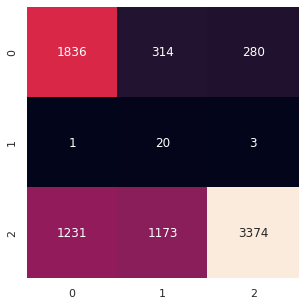

In [225]:

from sklearn.metrics import confusion_matrix
plt.figure(figsize=(15,5))
knn= confusion_matrix(y_test,y_pred_nb)
sns.heatmap(knn.T, square=True, annot=True, fmt='d', cbar=False,)
plt.show()

In [226]:
knn_df=pd.DataFrame({'y_test':y_test,'y_pred_knn':y_pred_knn})
knn_df.head()

,y_test,y_pred_knn
21746,Negative,Negative
27641,Positive,Positive
16374,Neutral,Positive
35458,Negative,Negative
38444,Positive,Positive


In [227]:
knn_df.groupby(['y_test','y_pred_knn'])['y_pred_knn'].count()

y_test    y_pred_knn
Negative  Negative      1999
          Neutral        149
          Positive       920
Neutral   Negative       457
          Neutral        429
          Positive       621
Positive  Negative       803
          Neutral        262
          Positive      2592
Name: y_pred_knn, dtype: int64

In [228]:
print(classification_report (y_test,y_pred_knn))

              precision    recall  f1-score   support

    Negative       0.61      0.65      0.63      3068
     Neutral       0.51      0.28      0.37      1507
    Positive       0.63      0.71      0.67      3657

    accuracy                           0.61      8232
   macro avg       0.58      0.55      0.55      8232
weighted avg       0.60      0.61      0.60      8232



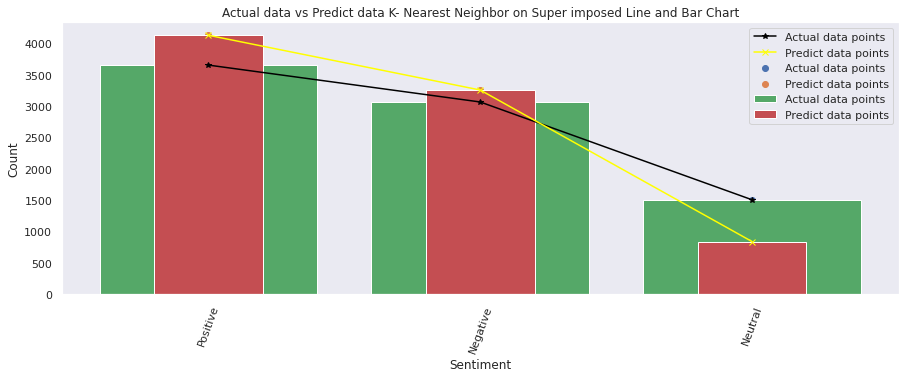

In [229]:
actual_nb=knn_df['y_test'].value_counts()
predict_nb=knn_df['y_pred_knn'].value_counts()
plt.figure(figsize=(15,5))
plt.scatter(actual_nb.index,actual_nb.values,label='Actual data points')
plt.plot(actual_nb.index,actual_nb.values,marker='*',color='black',label='Actual data points')
plt.plot(predict_nb.index,predict_nb.values,marker='x',color='yellow',label='Predict data points')
plt.scatter(predict_nb.index,predict_nb.values,label='Predict data points')
plt.bar(actual_nb.index,actual_nb.values,label='Actual data points')
plt.bar(predict_nb.index,predict_nb.values,width=0.4,label='Predict data points')
plt.legend()
plt.title("Actual data vs Predict data K- Nearest Neighbor on Super imposed Line and Bar Chart")
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=70)
plt.grid()
plt.show()

In [230]:
metrics.accuracy_score(y_test,y_pred_knn)

0.6098153547133139

### Support Vector Machines (SVM) and Radial Basis Function (RBF) kernel

#### Linear SVM

In [285]:
from sklearn.svm import SVC

In [286]:
svc_lin = SVC(kernel = 'linear')
svc_lin.fit(x_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [287]:
print(svc_lin.score(x_train,y_train))
print(svc_lin.score(x_test,y_test))

0.9382536066818526
0.8028425655976676


In [288]:
y_pred_lin = svc_lin.predict(x_test)
y_pred_lin

array(['Negative', 'Positive', 'Negative', ..., 'Neutral', 'Negative',
       'Positive'], dtype=object)

In [289]:
from sklearn.metrics import classification_report,accuracy_score, confusion_matrix

In [290]:
confusion_matrix(y_test,y_pred_lin)

array([[2543,  198,  327],
       [ 244,  993,  270],
       [ 363,  221, 3073]])

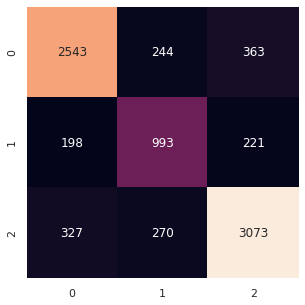

In [291]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(15,5))
svc_lin= confusion_matrix(y_test,y_pred_lin)
sns.heatmap(svc_lin.T, square=True, annot=True, fmt='d', cbar=False,)
plt.show()

In [292]:
print(classification_report(y_test,y_pred_lin))

              precision    recall  f1-score   support

    Negative       0.81      0.83      0.82      3068
     Neutral       0.70      0.66      0.68      1507
    Positive       0.84      0.84      0.84      3657

    accuracy                           0.80      8232
   macro avg       0.78      0.78      0.78      8232
weighted avg       0.80      0.80      0.80      8232



In [293]:
svc_df=pd.DataFrame({'y_test':y_test,'y_pred_lin':y_pred_lin})
svc_df.head()

,y_test,y_pred_lin
21746,Negative,Negative
27641,Positive,Positive
16374,Neutral,Negative
35458,Negative,Negative
38444,Positive,Positive


In [294]:
svc_df.groupby(['y_test','y_pred_lin'])['y_pred_lin'].count()   

y_test    y_pred_lin
Negative  Negative      2543
          Neutral        198
          Positive       327
Neutral   Negative       244
          Neutral        993
          Positive       270
Positive  Negative       363
          Neutral        221
          Positive      3073
Name: y_pred_lin, dtype: int64

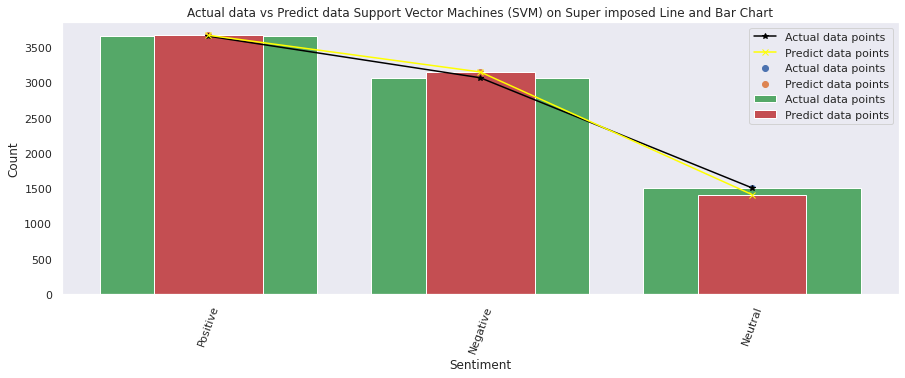

In [295]:
actual_nb=svc_df['y_test'].value_counts()
predict_nb=svc_df['y_pred_lin'].value_counts()
plt.figure(figsize=(15,5))
plt.scatter(actual_nb.index,actual_nb.values,label='Actual data points')
plt.plot(actual_nb.index,actual_nb.values,marker='*',color='black',label='Actual data points')
plt.plot(predict_nb.index,predict_nb.values,marker='x',color='yellow',label='Predict data points')
plt.scatter(predict_nb.index,predict_nb.values,label='Predict data points')
plt.bar(actual_nb.index,actual_nb.values,label='Actual data points')
plt.bar(predict_nb.index,predict_nb.values,width=0.4,label='Predict data points')
plt.legend()
plt.title("Actual data vs Predict data Support Vector Machines (SVM) on Super imposed Line and Bar Chart")
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=70)
plt.grid()
plt.show()

In [296]:
print('Accuracy Score for Poly SVC',accuracy_score(y_test,y_pred_lin))

Accuracy Score for Poly SVC 0.8028425655976676


### Radial Basis Function (RBF) kernel

In [297]:
svc_rbf = SVC(kernel = 'rbf',C=0.2,gamma=0.3)
svc_rbf.fit(x_train,y_train)

SVC(C=0.2, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.3, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [298]:
print(svc_rbf.score(x_train,y_train))
print(svc_rbf.score(x_test,y_test))

0.6652695520121488
0.6370262390670554


In [299]:
y_pred_rbf = svc_rbf.predict(x_test)
y_pred_rbf

array(['Negative', 'Positive', 'Positive', ..., 'Positive', 'Negative',
       'Positive'], dtype=object)

In [300]:
confusion_matrix(y_test,y_pred_rbf)

array([[1985,    2, 1081],
       [ 280,    1, 1226],
       [ 399,    0, 3258]])

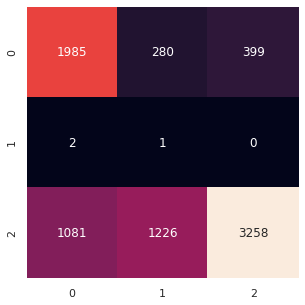

In [301]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(15,5))
svc_rbf= confusion_matrix(y_test,y_pred_rbf)
sns.heatmap(svc_rbf.T, square=True, annot=True, fmt='d', cbar=False,)
plt.show()

In [302]:
print(classification_report(y_test,y_pred_rbf))

              precision    recall  f1-score   support

    Negative       0.75      0.65      0.69      3068
     Neutral       0.33      0.00      0.00      1507
    Positive       0.59      0.89      0.71      3657

    accuracy                           0.64      8232
   macro avg       0.55      0.51      0.47      8232
weighted avg       0.60      0.64      0.57      8232



In [303]:
print('Accuracy Score for Poly SVC',accuracy_score(y_test,y_pred_rbf))

Accuracy Score for Poly SVC 0.6370262390670554


In [304]:
svc_df=pd.DataFrame({'y_test':y_test,'y_pred_rbf':y_pred_rbf})
svc_df.head()

,y_test,y_pred_rbf
21746,Negative,Negative
27641,Positive,Positive
16374,Neutral,Positive
35458,Negative,Negative
38444,Positive,Positive


In [305]:
svc_df.groupby(['y_test','y_pred_rbf'])['y_pred_rbf'].count()   

y_test    y_pred_rbf
Negative  Negative      1985
          Neutral          2
          Positive      1081
Neutral   Negative       280
          Neutral          1
          Positive      1226
Positive  Negative       399
          Positive      3258
Name: y_pred_rbf, dtype: int64

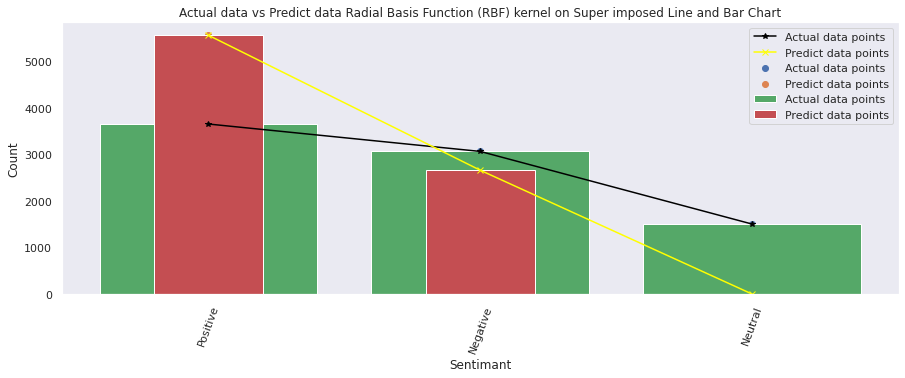

In [306]:
actual_nb=svc_df['y_test'].value_counts()
predict_nb=svc_df['y_pred_rbf'].value_counts()
plt.figure(figsize=(15,5))
plt.scatter(actual_nb.index,actual_nb.values,label='Actual data points')
plt.plot(actual_nb.index,actual_nb.values,marker='*',color='black',label='Actual data points')
plt.plot(predict_nb.index,predict_nb.values,marker='x',color='yellow',label='Predict data points')
plt.scatter(predict_nb.index,predict_nb.values,label='Predict data points')
plt.bar(actual_nb.index,actual_nb.values,label='Actual data points')
plt.bar(predict_nb.index,predict_nb.values,width=0.4,label='Predict data points')
plt.legend()
plt.title("Actual data vs Predict data Radial Basis Function (RBF) kernel on Super imposed Line and Bar Chart")
plt.xlabel('Sentimant')
plt.ylabel('Count')
plt.xticks(rotation=70)
plt.grid()
plt.show()

In [307]:
print('Accuracy Score for Poly SVC',accuracy_score(y_test,y_pred_rbf))

Accuracy Score for Poly SVC 0.6370262390670554


# CountVectorizer 

### 1. Multinomial Naive Bayes

In [308]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(lowercase=True,stop_words='english',ngram_range=(1,1), tokenizer = token.tokenize)
X = cv.fit_transform(df['OriginalTweet'])
X

<41157x78279 sparse matrix of type '<class 'numpy.int64'>'
	with 770215 stored elements in Compressed Sparse Row format>

In [310]:
df.head(2)

,OriginalTweet,Sentiment1
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,advice Talk to your neighbours family to excha...,Positive


In [311]:
y=df['Sentiment1']

In [312]:
from sklearn.model_selection import train_test_split
xx_train, xx_test, yy_train, yy_test = train_test_split(X,y, test_size=0.3, random_state=123)

In [313]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
nb= MultinomialNB().fit(xx_train,yy_train)
nb

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [314]:
nb.score(xx_train,yy_train)

0.8297407060293658

In [315]:
nb.score(xx_test,yy_test)

0.6657758341431811

In [316]:
y_pred_nb= nb.predict(xx_test)
print(len(y_pred_nb))
y_pred_nb

12348


array(['Negative', 'Positive', 'Positive', ..., 'Positive', 'Positive',
       'Positive'], dtype='<U8')

In [317]:
metrics.accuracy_score(yy_test,y_pred_nb)

0.6657758341431811

In [318]:
print(confusion_matrix (yy_test,y_pred_nb))

[[3383   82 1145]
 [ 711  472 1108]
 [ 968  113 4366]]


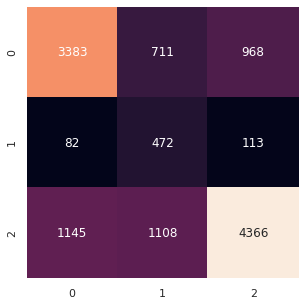

In [319]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(15,5))
nb= confusion_matrix(yy_test,y_pred_nb)
sns.heatmap(nb.T, square=True, annot=True, fmt='d', cbar=False,)
plt.show()

In [320]:
nb_df=pd.DataFrame({'yy_test':yy_test,'y_pred_nb':y_pred_nb})
nb_df.head()

,yy_test,y_pred_nb
21746,Negative,Negative
27641,Positive,Positive
16374,Neutral,Positive
35458,Negative,Negative
38444,Positive,Positive


In [321]:
nb_df.groupby(['yy_test','y_pred_nb'])['y_pred_nb'].count()   # difference between actual and Predicted

yy_test   y_pred_nb
Negative  Negative     3383
          Neutral        82
          Positive     1145
Neutral   Negative      711
          Neutral       472
          Positive     1108
Positive  Negative      968
          Neutral       113
          Positive     4366
Name: y_pred_nb, dtype: int64

In [322]:
from sklearn.metrics import classification_report
print(classification_report (yy_test,y_pred_nb))

              precision    recall  f1-score   support

    Negative       0.67      0.73      0.70      4610
     Neutral       0.71      0.21      0.32      2291
    Positive       0.66      0.80      0.72      5447

    accuracy                           0.67     12348
   macro avg       0.68      0.58      0.58     12348
weighted avg       0.67      0.67      0.64     12348



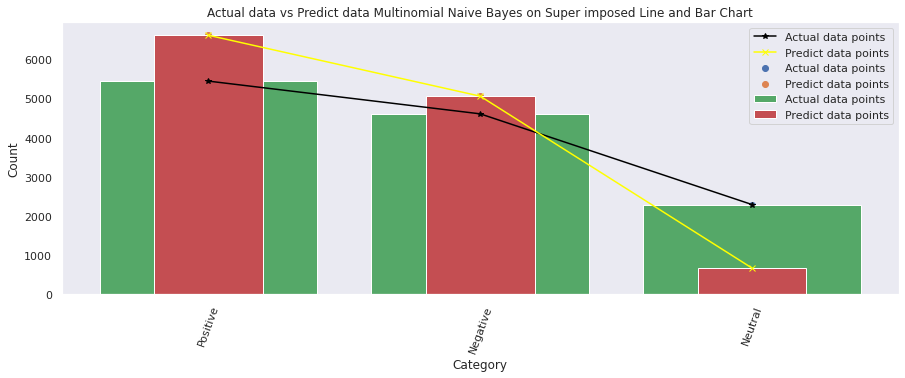

In [323]:
actual_nb=nb_df['yy_test'].value_counts()
predict_nb=nb_df['y_pred_nb'].value_counts()
plt.figure(figsize=(15,5))
plt.scatter(actual_nb.index,actual_nb.values,label='Actual data points')
plt.plot(actual_nb.index,actual_nb.values,marker='*',color='black',label='Actual data points')
plt.plot(predict_nb.index,predict_nb.values,marker='x',color='yellow',label='Predict data points')
plt.scatter(predict_nb.index,predict_nb.values,label='Predict data points')
plt.bar(actual_nb.index,actual_nb.values,label='Actual data points')
plt.bar(predict_nb.index,predict_nb.values,width=0.4,label='Predict data points')
plt.legend()
plt.title("Actual data vs Predict data Multinomial Naive Bayes on Super imposed Line and Bar Chart")
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=70)
plt.grid()
plt.show()

In [324]:
print("MultinomialNB Accuracy:",metrics.accuracy_score(yy_test,y_pred_nb))

MultinomialNB Accuracy: 0.6657758341431811


### 2. Logistic Regression


In [325]:
from sklearn.linear_model import LogisticRegression
lr =LogisticRegression()
lr.fit(xx_train,yy_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [326]:
lr.score(xx_train,yy_train)

0.981915373667951

In [327]:
lr.score(xx_test,yy_test)

0.7904923874311629

In [328]:
y_pred_lr = lr.predict(xx_test)
len(y_pred_lr),y_pred_lr

(12348, array(['Negative', 'Positive', 'Neutral', ..., 'Negative', 'Positive',
        'Positive'], dtype=object))

In [329]:
metrics.accuracy_score(yy_test,y_pred_lr)

0.7904923874311629

In [330]:
from sklearn.metrics import confusion_matrix
confusion_matrix(yy_test,y_pred_lr)

array([[3667,  405,  538],
       [ 321, 1610,  360],
       [ 559,  404, 4484]])

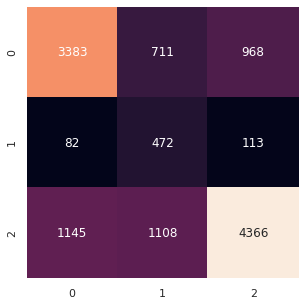

In [331]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(15,5))
lr= confusion_matrix(yy_test,y_pred_nb)
sns.heatmap(lr.T, square=True, annot=True, fmt='d', cbar=False,)
plt.show()

In [332]:
lr_df=pd.DataFrame({'yy_test':yy_test,'y_pred_lr':y_pred_lr})
lr_df.head()

,yy_test,y_pred_lr
21746,Negative,Negative
27641,Positive,Positive
16374,Neutral,Neutral
35458,Negative,Negative
38444,Positive,Positive


In [333]:
lr_df.groupby(['yy_test','y_pred_lr'])['y_pred_lr'].count()

yy_test   y_pred_lr
Negative  Negative     3667
          Neutral       405
          Positive      538
Neutral   Negative      321
          Neutral      1610
          Positive      360
Positive  Negative      559
          Neutral       404
          Positive     4484
Name: y_pred_lr, dtype: int64

In [334]:
from sklearn.metrics import classification_report
print(classification_report (yy_test,y_pred_lr))

              precision    recall  f1-score   support

    Negative       0.81      0.80      0.80      4610
     Neutral       0.67      0.70      0.68      2291
    Positive       0.83      0.82      0.83      5447

    accuracy                           0.79     12348
   macro avg       0.77      0.77      0.77     12348
weighted avg       0.79      0.79      0.79     12348



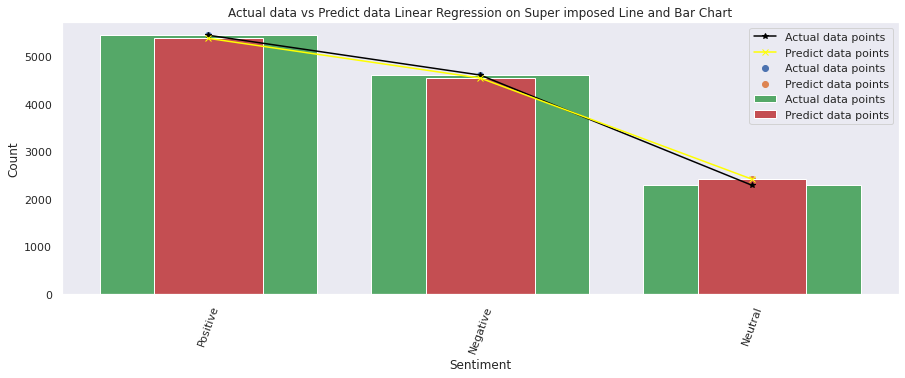

In [335]:
actual_nb=lr_df['yy_test'].value_counts()
predict_nb=lr_df['y_pred_lr'].value_counts()
plt.figure(figsize=(15,5))
plt.scatter(actual_nb.index,actual_nb.values,label='Actual data points')
plt.plot(actual_nb.index,actual_nb.values,marker='*',color='black',label='Actual data points')
plt.plot(predict_nb.index,predict_nb.values,marker='x',color='yellow',label='Predict data points')
plt.scatter(predict_nb.index,predict_nb.values,label='Predict data points')
plt.bar(actual_nb.index,actual_nb.values,label='Actual data points')
plt.bar(predict_nb.index,predict_nb.values,width=0.4,label='Predict data points')
plt.legend()
plt.title("Actual data vs Predict data Linear Regression on Super imposed Line and Bar Chart")
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=70)
plt.grid()
plt.show()

In [336]:
metrics.accuracy_score(yy_test,y_pred_lr)

0.7904923874311629

### 3. Random  Forest  Classifier  

In [337]:
from sklearn.ensemble import RandomForestClassifier

In [338]:
rfc = RandomForestClassifier(n_estimators=10,max_depth=5,max_features='sqrt',min_samples_split=20)

In [339]:
rfc.fit(xx_train,yy_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=20,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [340]:
rfc.fit(xx_test,yy_test)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=20,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [341]:
rfc.score(xx_test,yy_test)

0.4680919987042436

In [342]:
rfc.score(xx_train,yy_train)

0.4581901489117984

In [343]:
y_pred_rfc = rfc.predict(xx_test)
y_pred_rfc

array(['Positive', 'Positive', 'Positive', ..., 'Positive', 'Positive',
       'Positive'], dtype=object)

In [344]:
confusion_matrix(yy_test,y_pred_rfc)

array([[ 400,    0, 4210],
       [  16,    0, 2275],
       [  67,    0, 5380]])

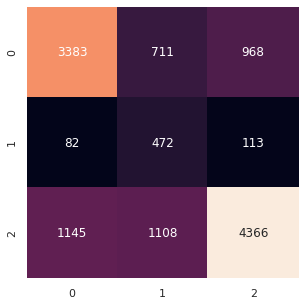

In [345]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(15,5))
rfc= confusion_matrix(yy_test,y_pred_nb)
sns.heatmap(rfc.T, square=True, annot=True, fmt='d', cbar=False,)
plt.show()

In [346]:
rfc_df=pd.DataFrame({'yy_test':yy_test,'y_pred_rfc':y_pred_rfc})
rfc_df.head()

,yy_test,y_pred_rfc
21746,Negative,Positive
27641,Positive,Positive
16374,Neutral,Positive
35458,Negative,Positive
38444,Positive,Positive


In [347]:
rfc_df.groupby(['yy_test','y_pred_rfc'])['y_pred_rfc'].count()

yy_test   y_pred_rfc
Negative  Negative       400
          Positive      4210
Neutral   Negative        16
          Positive      2275
Positive  Negative        67
          Positive      5380
Name: y_pred_rfc, dtype: int64

In [348]:
print(classification_report(yy_test,y_pred_rfc))

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

    Negative       0.83      0.09      0.16      4610
     Neutral       0.00      0.00      0.00      2291
    Positive       0.45      0.99      0.62      5447

    accuracy                           0.47     12348
   macro avg       0.43      0.36      0.26     12348
weighted avg       0.51      0.47      0.33     12348



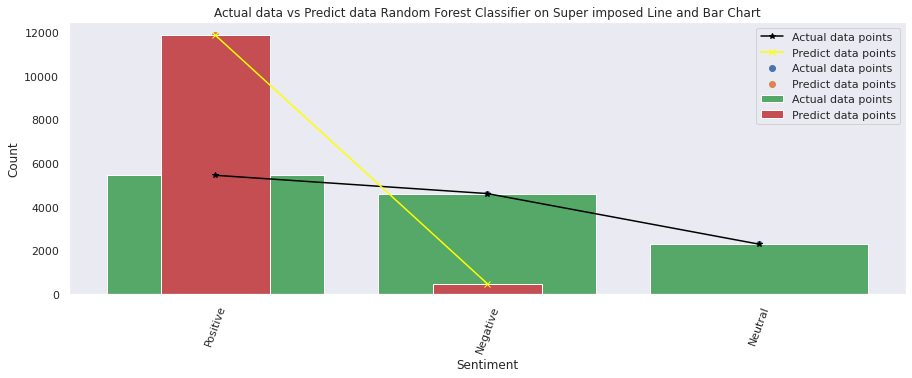

In [349]:
actual_nb=rfc_df['yy_test'].value_counts()
predict_nb=rfc_df['y_pred_rfc'].value_counts()
plt.figure(figsize=(15,5))
plt.scatter(actual_nb.index,actual_nb.values,label='Actual data points')
plt.plot(actual_nb.index,actual_nb.values,marker='*',color='black',label='Actual data points')
plt.plot(predict_nb.index,predict_nb.values,marker='x',color='yellow',label='Predict data points')
plt.scatter(predict_nb.index,predict_nb.values,label='Predict data points')
plt.bar(actual_nb.index,actual_nb.values,label='Actual data points')
plt.bar(predict_nb.index,predict_nb.values,width=0.4,label='Predict data points')
plt.legend()
plt.title("Actual data vs Predict data Random Forest Classifier on Super imposed Line and Bar Chart")
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=70)
plt.grid()
plt.show()

In [350]:
metrics.accuracy_score(yy_test,y_pred_rfc)

0.4680919987042436

In [351]:
from sklearn import tree

### 4. Decision Tree

In [352]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(xx_train,yy_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [353]:
print(dt.score(xx_train,yy_train))
print(dt.score(xx_test,yy_test))

0.9999652886250825
0.6814868804664723


In [354]:
y_pred_dt = dt.predict(xx_test)
y_pred_dt

array(['Negative', 'Positive', 'Neutral', ..., 'Negative', 'Positive',
       'Neutral'], dtype=object)

In [355]:
confusion_matrix(yy_test,y_pred_dt)

array([[3009,  606,  995],
       [ 402, 1489,  400],
       [ 995,  535, 3917]])

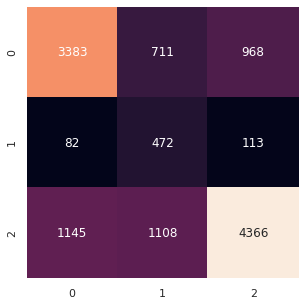

In [356]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(15,5))
dt= confusion_matrix(yy_test,y_pred_nb)
sns.heatmap(dt.T, square=True, annot=True, fmt='d', cbar=False,)
plt.show()

In [357]:
dt_df=pd.DataFrame({'yy_test':yy_test,'y_pred_dt':y_pred_dt})
dt_df.head()

,yy_test,y_pred_dt
21746,Negative,Negative
27641,Positive,Positive
16374,Neutral,Neutral
35458,Negative,Negative
38444,Positive,Positive


In [358]:
dt_df.groupby(['yy_test','y_pred_dt'])['y_pred_dt'].count()

yy_test   y_pred_dt
Negative  Negative     3009
          Neutral       606
          Positive      995
Neutral   Negative      402
          Neutral      1489
          Positive      400
Positive  Negative      995
          Neutral       535
          Positive     3917
Name: y_pred_dt, dtype: int64

In [359]:
print(classification_report(yy_test,y_pred_dt))

              precision    recall  f1-score   support

    Negative       0.68      0.65      0.67      4610
     Neutral       0.57      0.65      0.61      2291
    Positive       0.74      0.72      0.73      5447

    accuracy                           0.68     12348
   macro avg       0.66      0.67      0.67     12348
weighted avg       0.69      0.68      0.68     12348



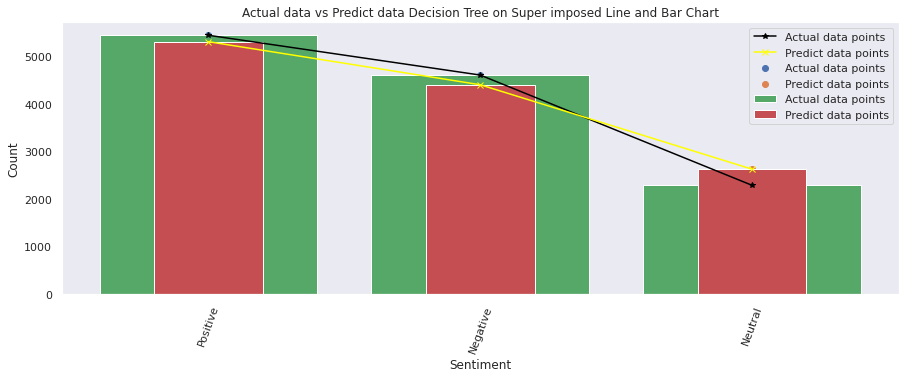

In [360]:
actual_nb=dt_df['yy_test'].value_counts()
predict_nb=dt_df['y_pred_dt'].value_counts()
plt.figure(figsize=(15,5))
plt.scatter(actual_nb.index,actual_nb.values,label='Actual data points')
plt.plot(actual_nb.index,actual_nb.values,marker='*',color='black',label='Actual data points')
plt.plot(predict_nb.index,predict_nb.values,marker='x',color='yellow',label='Predict data points')
plt.scatter(predict_nb.index,predict_nb.values,label='Predict data points')
plt.bar(actual_nb.index,actual_nb.values,label='Actual data points')
plt.bar(predict_nb.index,predict_nb.values,width=0.4,label='Predict data points')
plt.legend()
plt.title("Actual data vs Predict data Decision Tree on Super imposed Line and Bar Chart")
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=70)
plt.grid()
plt.show()

In [361]:
print(accuracy_score(yy_test,y_pred_dt))

0.6814868804664723


### 5. K- Nearest Neighbor

In [362]:
from sklearn.neighbors import KNeighborsClassifier

In [363]:
knn = KNeighborsClassifier(n_neighbors=21)
knn.fit(xx_train,yy_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=21, p=2,
                     weights='uniform')

In [364]:
print(knn.score(xx_train,yy_train))
print(knn.score(xx_test,yy_test))

0.26890902148634105
0.2529154518950437


In [365]:
y_pred_knn = knn.predict(xx_test)  # numpy
y_pred_knn

array(['Neutral', 'Neutral', 'Neutral', ..., 'Neutral', 'Neutral',
       'Neutral'], dtype=object)

In [366]:
print(confusion_matrix (yy_test,y_pred_knn))

[[ 452 4094   64]
 [  17 2264   10]
 [ 163 4877  407]]


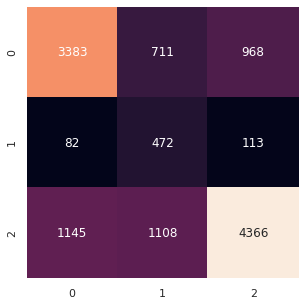

In [367]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(15,5))
knn= confusion_matrix(yy_test,y_pred_nb)
sns.heatmap(knn.T, square=True, annot=True, fmt='d', cbar=False,)
plt.show()

In [368]:
knn_df=pd.DataFrame({'yy_test':yy_test,'y_pred_knn':y_pred_knn})
knn_df.head()

,yy_test,y_pred_knn
21746,Negative,Neutral
27641,Positive,Neutral
16374,Neutral,Neutral
35458,Negative,Neutral
38444,Positive,Neutral


In [369]:
knn_df.groupby(['yy_test','y_pred_knn'])['y_pred_knn'].count()

yy_test   y_pred_knn
Negative  Negative       452
          Neutral       4094
          Positive        64
Neutral   Negative        17
          Neutral       2264
          Positive        10
Positive  Negative       163
          Neutral       4877
          Positive       407
Name: y_pred_knn, dtype: int64

In [370]:
print(classification_report (yy_test,y_pred_knn))

              precision    recall  f1-score   support

    Negative       0.72      0.10      0.17      4610
     Neutral       0.20      0.99      0.33      2291
    Positive       0.85      0.07      0.14      5447

    accuracy                           0.25     12348
   macro avg       0.59      0.39      0.21     12348
weighted avg       0.68      0.25      0.19     12348



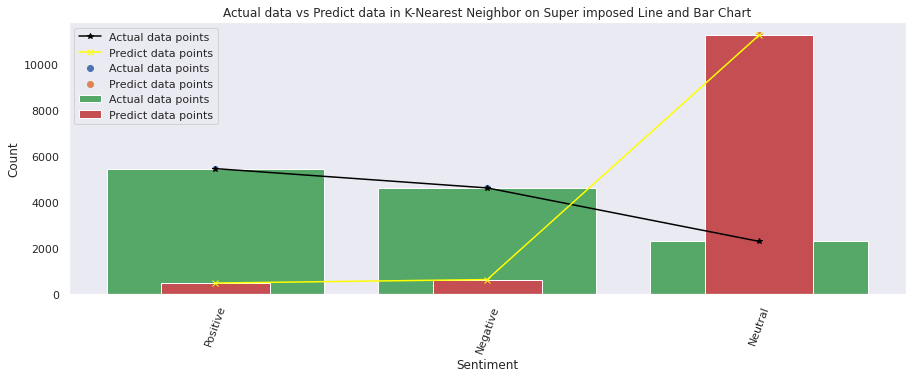

In [371]:
actual_nb=knn_df['yy_test'].value_counts()
predict_nb=knn_df['y_pred_knn'].value_counts()
plt.figure(figsize=(15,5))
plt.scatter(actual_nb.index,actual_nb.values,label='Actual data points')
plt.plot(actual_nb.index,actual_nb.values,marker='*',color='black',label='Actual data points')
plt.plot(predict_nb.index,predict_nb.values,marker='x',color='yellow',label='Predict data points')
plt.scatter(predict_nb.index,predict_nb.values,label='Predict data points')
plt.bar(actual_nb.index,actual_nb.values,label='Actual data points')
plt.bar(predict_nb.index,predict_nb.values,width=0.4,label='Predict data points')
plt.legend()
plt.title("Actual data vs Predict data in K-Nearest Neighbor on Super imposed Line and Bar Chart")
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=70)
plt.grid()
plt.show()

In [372]:
metrics.accuracy_score(yy_test,y_pred_knn)

0.2529154518950437

### Support Vector Machines (SVM) and Radial Basis Function (RBF) kernel

In [373]:
from sklearn.svm import SVC

In [374]:
svc_lin = SVC(kernel = 'linear')
svc_lin.fit(xx_train,yy_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [375]:
print(svc_lin.score(xx_train,yy_train))
print(svc_lin.score(xx_test,yy_test))

0.9944808913881079
0.7742144476838354


In [376]:
y_pred_lin = svc_lin.predict(xx_test)
y_pred_lin

array(['Negative', 'Positive', 'Neutral', ..., 'Negative', 'Positive',
       'Neutral'], dtype=object)

In [377]:
from sklearn.metrics import classification_report,accuracy_score, confusion_matrix
from sklearn.metrics import classification_report,accuracy_score, confusion_matrix

In [378]:
confusion_matrix(yy_test,y_pred_lin)

array([[3632,  466,  512],
       [ 393, 1571,  327],
       [ 659,  431, 4357]])

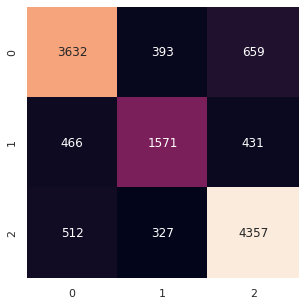

In [379]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(15,5))
svc_lin= confusion_matrix(yy_test,y_pred_lin)
sns.heatmap(svc_lin.T, square=True, annot=True, fmt='d', cbar=False,)
plt.show()

In [380]:
print(classification_report(yy_test,y_pred_lin))

              precision    recall  f1-score   support

    Negative       0.78      0.79      0.78      4610
     Neutral       0.64      0.69      0.66      2291
    Positive       0.84      0.80      0.82      5447

    accuracy                           0.77     12348
   macro avg       0.75      0.76      0.75     12348
weighted avg       0.78      0.77      0.78     12348



In [381]:
svc_df=pd.DataFrame({'yy_test':yy_test,'y_pred_lin':y_pred_lin})
svc_df.head()

,yy_test,y_pred_lin
21746,Negative,Negative
27641,Positive,Positive
16374,Neutral,Neutral
35458,Negative,Negative
38444,Positive,Positive


In [382]:
svc_df.groupby(['yy_test','y_pred_lin'])['y_pred_lin'].count()   

yy_test   y_pred_lin
Negative  Negative      3632
          Neutral        466
          Positive       512
Neutral   Negative       393
          Neutral       1571
          Positive       327
Positive  Negative       659
          Neutral        431
          Positive      4357
Name: y_pred_lin, dtype: int64

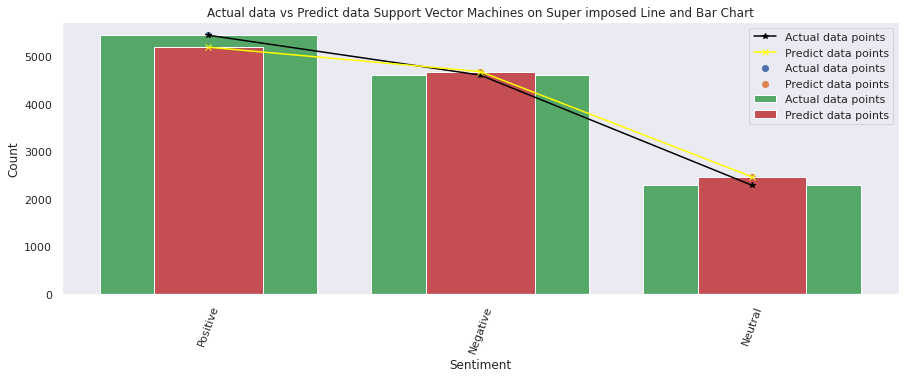

In [383]:
actual_nb=svc_df['yy_test'].value_counts()
predict_nb=svc_df['y_pred_lin'].value_counts()
plt.figure(figsize=(15,5))
plt.scatter(actual_nb.index,actual_nb.values,label='Actual data points')
plt.plot(actual_nb.index,actual_nb.values,marker='*',color='black',label='Actual data points')
plt.plot(predict_nb.index,predict_nb.values,marker='x',color='yellow',label='Predict data points')
plt.scatter(predict_nb.index,predict_nb.values,label='Predict data points')
plt.bar(actual_nb.index,actual_nb.values,label='Actual data points')
plt.bar(predict_nb.index,predict_nb.values,width=0.4,label='Predict data points')
plt.legend()
plt.title("Actual data vs Predict data Support Vector Machines on Super imposed Line and Bar Chart")
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=70)
plt.grid()
plt.show()

In [384]:
print('Accuracy Score for Poly SVC',accuracy_score(yy_test,y_pred_lin))

Accuracy Score for Poly SVC 0.7742144476838354


### Radial Basis Function (RBF) kernel

In [385]:
svc_rbf = SVC(kernel = 'rbf',C=0.2,gamma=0.3)
svc_rbf.fit(xx_train,yy_train)

SVC(C=0.2, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.3, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [386]:
print(svc_rbf.score(xx_train,yy_train))
print(svc_rbf.score(xx_test,yy_test))

0.4666944357666007
0.456511175898931


In [387]:
y_pred_rbf = svc_rbf.predict(xx_test)
y_pred_rbf

array(['Positive', 'Positive', 'Positive', ..., 'Positive', 'Positive',
       'Positive'], dtype=object)

In [388]:
confusion_matrix(yy_test,y_pred_rbf)

array([[  24,   74, 4512],
       [  11,  267, 2013],
       [   7,   94, 5346]])

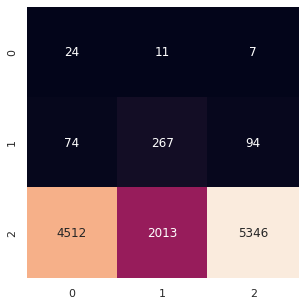

In [389]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(15,5))
svc_rbf= confusion_matrix(yy_test,y_pred_rbf)
sns.heatmap(svc_rbf.T, square=True, annot=True, fmt='d', cbar=False,)
plt.show()

In [390]:
print(classification_report(yy_test,y_pred_rbf))

              precision    recall  f1-score   support

    Negative       0.57      0.01      0.01      4610
     Neutral       0.61      0.12      0.20      2291
    Positive       0.45      0.98      0.62      5447

    accuracy                           0.46     12348
   macro avg       0.55      0.37      0.27     12348
weighted avg       0.53      0.46      0.31     12348



In [391]:
print('Accuracy Score for Poly SVC',accuracy_score(yy_test,y_pred_rbf))

Accuracy Score for Poly SVC 0.456511175898931


In [392]:
svc_df=pd.DataFrame({'yy_test':yy_test,'y_pred_rbf':y_pred_rbf})
svc_df.head()

,yy_test,y_pred_rbf
21746,Negative,Positive
27641,Positive,Positive
16374,Neutral,Positive
35458,Negative,Positive
38444,Positive,Positive


In [393]:
svc_df.groupby(['yy_test','y_pred_rbf'])['y_pred_rbf'].count()   

yy_test   y_pred_rbf
Negative  Negative        24
          Neutral         74
          Positive      4512
Neutral   Negative        11
          Neutral        267
          Positive      2013
Positive  Negative         7
          Neutral         94
          Positive      5346
Name: y_pred_rbf, dtype: int64

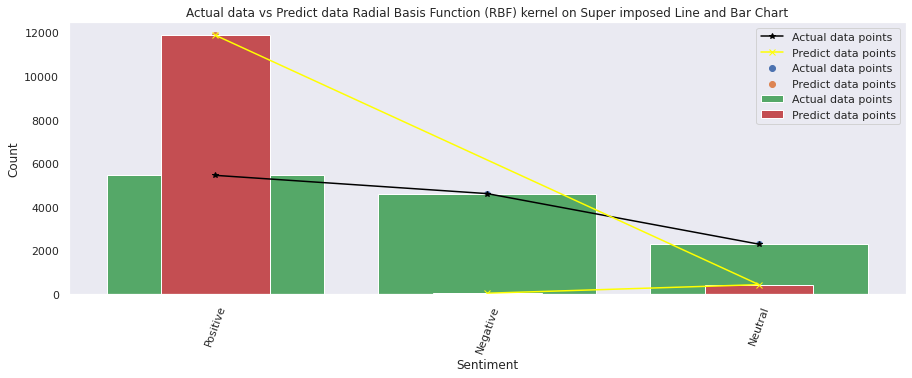

In [394]:
actual_nb=svc_df['yy_test'].value_counts()
predict_nb=svc_df['y_pred_rbf'].value_counts()
plt.figure(figsize=(15,5))
plt.scatter(actual_nb.index,actual_nb.values,label='Actual data points')
plt.plot(actual_nb.index,actual_nb.values,marker='*',color='black',label='Actual data points')
plt.plot(predict_nb.index,predict_nb.values,marker='x',color='yellow',label='Predict data points')
plt.scatter(predict_nb.index,predict_nb.values,label='Predict data points')
plt.bar(actual_nb.index,actual_nb.values,label='Actual data points')
plt.bar(predict_nb.index,predict_nb.values,width=0.4,label='Predict data points')
plt.legend()
plt.title("Actual data vs Predict data Radial Basis Function (RBF) kernel on Super imposed Line and Bar Chart")
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=70)
plt.grid()
plt.show()

In [395]:
print('Accuracy Score for Poly SVC',accuracy_score(yy_test,y_pred_rbf))

Accuracy Score for Poly SVC 0.456511175898931


*MOdels* in Term Frequncy - Inverse Document Frequncy(TF-IDF) - Naive Bayes, Logistic Regression, Random Forest, Decision Tree, K-Nearest Neighbour, Support vector Mechine, Radial Basis Functions
```
MultinomialNB Accuracy Score : 0.6353255587949466

Logistice Regression - Accuracy Score : 0.7920310981535471

Rendom Forest - Accuracy Score : 0.461491739552964
Decision Tree - Accuracy Score : 0.593415937803693
K-Nearest Neighbour - Accuracy Score : 0.6098153547133139

Support Vector Machine - Accuracy Score : 0.8028425655976676

Radial Basis Functions - Accuracy Score : 0.6370262390670554

```



*MOdels* in CountVectorizer -Artificial Neural Network, Naive Bayes, Logistic Regression, Random Forest, Decision Tree, K-Nearest Neighbour, Support vector Mechine, Radial Basis Functions
```
Artifical Neural Network - Accuracy Score : 0.2193877551020408

MultinomialNB Accuracy Score : 0.6657758341431811 

Logistice Regression - Accuracy Score : 0.7904923874311629

Rendom Forest - Accuracy Score : 0.4680919987042436
Decision Tree - Accuracy Score : 0.6814868804664723
K-Nearest Neighbour - Accuracy Score : 0.2529154518950437

Support Vector Machine - Accuracy Score : 0.7742144476838354

Radial Basis Functions - Accuracy Score : 0.456511175898931

```